`https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data` <br>

**Question:** Is the comment is toxic? E.g, Use Logistic Regression

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

import re
import nltk
import string
import seaborn as sns

from nltk.corpus import stopwords # Remove useless words
from nltk.stem.lancaster import LancasterStemmer # Convert words to base form; aggressive

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
type(stopwords.words('english'))

list

In [3]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

# Load and View Data

In [2]:
df = pd.read_csv('data/all_data.csv')
df.shape

(1999516, 46)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999516 entries, 0 to 1999515
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   split                                object 
 3   created_date                         object 
 4   publication_id                       int64  
 5   parent_id                            float64
 6   article_id                           int64  
 7   rating                               object 
 8   funny                                int64  
 9   wow                                  int64  
 10  sad                                  int64  
 11  likes                                int64  
 12  disagree                             int64  
 13  toxicity                             float64
 14  severe_toxicity                      float64
 15  obscene                         

In [6]:
df.columns

Index(['id', 'comment_text', 'split', 'created_date', 'publication_id',
       'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
       'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

In [7]:
df.head(3)

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till after the election in 2 yrs.... dirty politicians need to be afraid of Tar and feathers again... but they aren't and so the people get screwed.,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,0,2,0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental hospitals. Boorah,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,1,2,0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by not making this announcement himself.\n\nWhat an awful human being .....,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,2,3,7,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63


In [8]:
df[['id','comment_text','toxicity', 'severe_toxicity', 'obscene', \
    'sexual_explicit', 'identity_attack', 'insult', 'threat']].head(3)

,id,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat
0,1083994,He got his money... now he lies in wait till after the election in 2 yrs.... dirty politicians need to be afraid of Tar and feathers again... but they aren't and so the people get screwed.,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925
1,650904,Mad dog will surely put the liberals in mental hospitals. Boorah,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789
2,5902188,And Trump continues his lifelong cowardice by not making this announcement himself.\n\nWhat an awful human being .....,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000


In [9]:
df[df['id']==5902188]

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
2,5902188,And Trump continues his lifelong cowardice by not making this announcement himself.\n\nWhat an awful human being .....,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,2,3,7,0.666667,0.015873,0.031746,0.0,0.047619,0.666667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63


In [10]:
df[df['id']==5902188]['comment_text']

2    And Trump continues his lifelong cowardice by not making this announcement himself.\n\nWhat an awful human being .....
Name: comment_text, dtype: object

In [11]:
df['comment_text'].loc[df['id']==5902188]

2    And Trump continues his lifelong cowardice by not making this announcement himself.\n\nWhat an awful human being .....
Name: comment_text, dtype: object

In [12]:
df['comment_text'].iloc[2]

'And Trump continues his lifelong cowardice by not making this announcement himself.\n\nWhat an awful human being .....'

In [13]:
df['comment_text'][2]

'And Trump continues his lifelong cowardice by not making this announcement himself.\n\nWhat an awful human being .....'

# Exploratory Data Analysis

In [14]:
# Count number of rows
df['male'].value_counts()

0.000000    359717
1.000000     20880
0.166667     10678
0.100000     10017
0.200000      9210
             ...  
0.003121         1
0.930788         1
0.125102         1
0.003788         1
0.001625         1
Name: male, Length: 260, dtype: int64

In [15]:
df['male'].value_counts(normalize=True)

0.000000    0.802940
1.000000    0.046607
0.166667    0.023835
0.100000    0.022359
0.200000    0.020558
              ...   
0.003121    0.000002
0.930788    0.000002
0.125102    0.000002
0.003788    0.000002
0.001625    0.000002
Name: male, Length: 260, dtype: float64

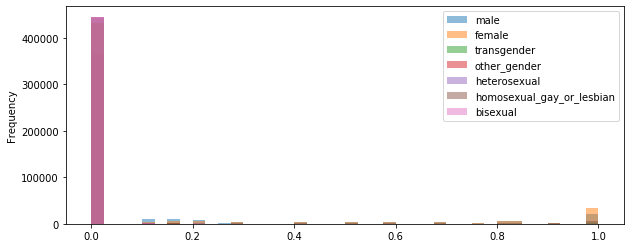

In [16]:
df[['male', 'female', 'transgender','other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual']]\
.plot.hist(bins=40,alpha=0.5,figsize=(10,4));

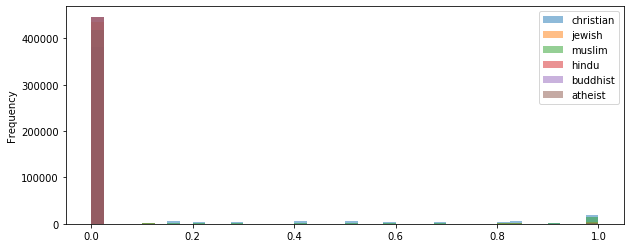

In [17]:
df[['christian', 'jewish', 'muslim', 'hindu','buddhist', 'atheist']]\
.plot.hist(bins=40,alpha=0.5,figsize=(10,4));

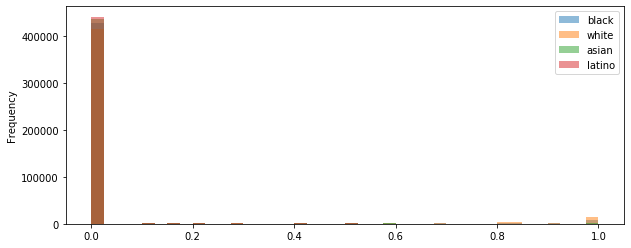

In [18]:
df[['black', 'white', 'asian','latino']]\
.plot.hist(bins=40,alpha=0.5,figsize=(10,4));

In [19]:
df[['black', 'white', 'asian','latino']].tail()

,black,white,asian,latino
1999511,0.0,0.8,0.0,0.0
1999512,0.0,0.0,0.0,0.0
1999513,0.0,0.0,0.0,0.0
1999514,0.0,0.0,0.0,0.0
1999515,0.0,0.0,0.0,0.0


# PCA Analysis

In [3]:
new_df = df[['id', 'funny', 'wow', 'sad', 'likes', 'disagree', \
             'male', 'female', 'transgender', 'other_gender', 'heterosexual', \
             'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation', \
             'christian', 'jewish', 'muslim', 'hindu', \
             'buddhist', 'atheist', 'other_religion', \
             'black', 'white', 'asian', 'latino', 'other_race_or_ethnicity', \
             'physical_disability', 'intellectual_or_learning_disability', \
             'psychiatric_or_mental_illness', 'other_disability', \
             'identity_annotator_count', 'toxicity_annotator_count']]
print(new_df.shape)
new_df.dropna(inplace=True)
print(new_df.shape)

(1999516, 32)
(448000, 32)


C:\Users\neatb\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [4]:
new_df.reset_index(drop=True, inplace=True)
new_df.head()

,id,funny,wow,sad,likes,disagree,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,627762,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,10
1,5892815,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,70
2,416437,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,61
3,5137126,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,11
4,855753,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,70


In [6]:
from sklearn.cluster import KMeans

x_cols = new_df.drop(['id'], axis=1)

kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans.fit(x_cols)
labels = kmeans.labels_
labels[:10]

array([0, 3, 3, 0, 3, 3, 3, 3, 0, 3])

In [57]:
unique, counts = np.unique(labels, return_counts=True)
print(f'unique = {unique}')
print(f'counts = {counts}')

unique = [0 1 2 3 4 5]
counts = [425010    193    233  22318    225     21]


In [7]:
from sklearn.decomposition import PCA

pca_df = pd.concat([new_df['id'],
                    pd.DataFrame(labels, columns=['cluster_id'])],
                    axis=1)

pca = PCA(n_components=2)

pca_df['x'] = pca.fit_transform(new_df[new_df.columns[1:]])[:,0]
pca_df['y'] = pca.fit_transform(new_df[new_df.columns[1:]])[:,1]

pca_df.head()

,id,cluster_id,x,y
0,627762,0,-0.360104,-2.388840
1,5892815,3,59.639848,-2.573001
2,416437,3,50.638612,-2.545346
3,5137126,0,0.640052,-2.391817
4,855753,3,59.639686,-2.573063


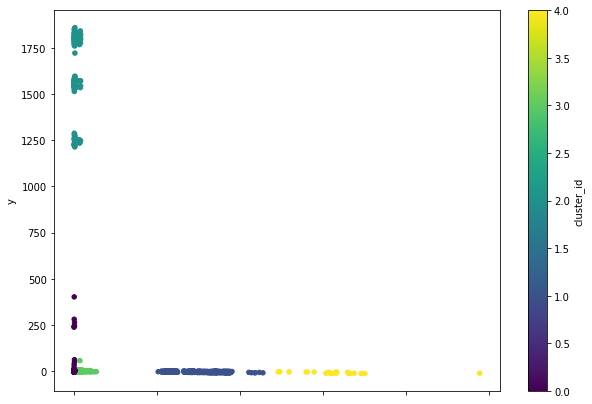

In [11]:
pca_df.plot.scatter(x='x', y='y', c='cluster_id', colormap='viridis', figsize=(10, 7));

**When x > 250, -13.14 < y < 0.38**

In [15]:
pca_df[pca_df['x'] > 250]['y'].min(), pca_df[pca_df['x'] > 250]['y'].max()

(-13.142371216184157, 0.381991098356384)

# Preprocess Toxic Data
- Data Imbalance
- Use cut_off **0.4** for toxicity, severe_toxicity, obscene, sexual_explicit, identity_attack, insult, and threat

In [20]:
CUT_OFF = 0.4

In [21]:
df['toxicity'].value_counts(sort=True)
#df['toxicity'].value_counts().sort_index()

0.000000    1401762
0.166667     153425
0.200000     118991
0.300000      65266
0.400000      55377
             ...   
0.001736          1
0.061179          1
0.825408          1
0.952642          1
0.884879          1
Name: toxicity, Length: 3063, dtype: int64

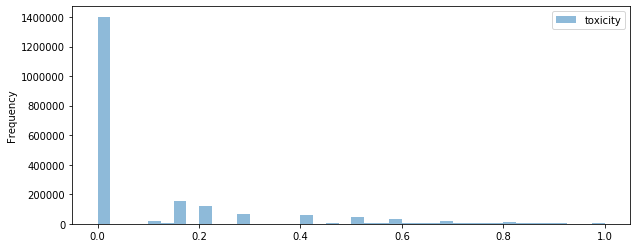

In [22]:
df[['toxicity']].plot.hist(bins=40,alpha=0.5,figsize=(10,4));

In [23]:
df['tox'] = pd.DataFrame(df['toxicity'] > CUT_OFF).astype(int)
df['s_tox'] = pd.DataFrame(df['severe_toxicity'] > CUT_OFF).astype(int)
df['obs'] = pd.DataFrame(df['obscene'] > CUT_OFF).astype(int)
df['s_exp'] = pd.DataFrame(df['sexual_explicit'] > CUT_OFF).astype(int)
df['i_att'] = pd.DataFrame(df['identity_attack'] > CUT_OFF).astype(int)
df['ins'] = pd.DataFrame(df['insult'] > CUT_OFF).astype(int)
df['thr'] = pd.DataFrame(df['threat'] > CUT_OFF).astype(int)

In [24]:
df[['toxicity', 'tox', 'severe_toxicity', 's_tox']].head()

,toxicity,tox,severe_toxicity,s_tox
0,0.373134,0,0.044776,0
1,0.605263,1,0.013158,0
2,0.666667,1,0.015873,0
3,0.815789,1,0.065789,0
4,0.550000,1,0.037500,0


In [25]:
df['tox'].value_counts()

0    1831882
1     167634
Name: tox, dtype: int64

In [26]:
toxic_count = df[['tox','s_tox','obs','s_exp','i_att','ins','thr']].sum()
toxic_count

tox      167634
s_tox        23
obs       12160
s_exp      5994
i_att     16540
ins      126388
thr        5283
dtype: int64

In [27]:
toxic_count.values

array([167634,     23,  12160,   5994,  16540, 126388,   5283],
      dtype=int64)

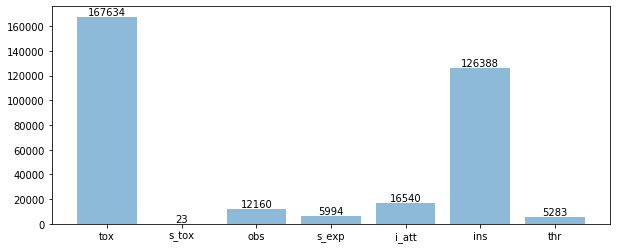

In [28]:
fig, ax = plt.subplots(figsize=(10,4))  

plt.bar(toxic_count.index, toxic_count, alpha=0.5);
    
rects = ax.patches
labels = toxic_count.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

# Preprocess Comment Text Data

In [29]:
re.sub(r'[^a-z ]',' ', '%&$sample*&#')

'   sample   '

In [30]:
import re
import string

# Replace '\n' with a space
x1 = lambda x: re.sub(r'\n', ' ', str(x))
    
# Remove all non-ascii characters
x2 = lambda x: re.sub(r'[^\x00-\x7f]', r' ', str(x))
    
# Remove all numbers with letters attached to them
x3 = lambda x: re.sub('\w*\d\w*', ' ', str(x))
   
# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
x4 = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', str(x))
        
# Convert to lowercase
x5 = lambda x: x.lower()

# df['comment_text'] = df['comment_text'].apply(str)
df['comment_text'] = df.comment_text.map(x1).map(x2).map(x3).map(x4).map(x5)

In [31]:
df[df['id']==5902188]['comment_text']

2    and trump continues his lifelong cowardice by not making this announcement himself   what an awful human being      
Name: comment_text, dtype: object

In [32]:
data = df[['id','comment_text','tox','s_tox','obs','s_exp','i_att','ins','thr']]
data.head(2)

,id,comment_text,tox,s_tox,obs,s_exp,i_att,ins,thr
0,1083994,he got his money now he lies in wait till after the election in yrs dirty politicians need to be afraid of tar and feathers again but they aren t and so the people get screwed,0,0,0,0,0,0,0
1,650904,mad dog will surely put the liberals in mental hospitals boorah,1,0,0,0,0,1,0


# WordCloud

In [33]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud

# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from nltk.corpus import stopwords

In [34]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset['comment_text'].values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

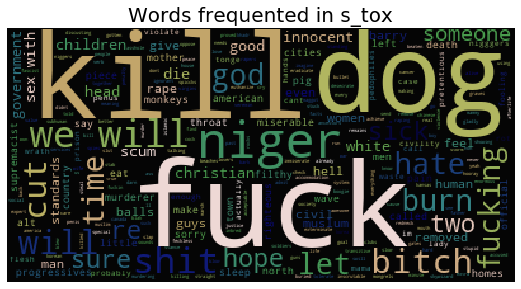

In [35]:
wordcloud(data, 's_tox')

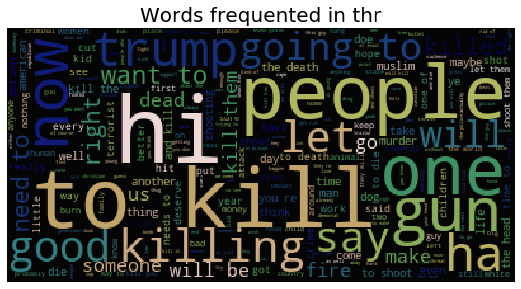

In [36]:
wordcloud(data, 'thr')

# Create Balanced Dataset
- Take 50% of non-toxic comments concatenated with 50% of toxic comment and getbalanced dataset

In [37]:
toxic_count = df[['tox','s_tox','obs','s_exp','i_att','ins','thr']].sum()
toxic_count

tox      167634
s_tox        23
obs       12160
s_exp      5994
i_att     16540
ins      126388
thr        5283
dtype: int64

In [38]:
# x0 = df[df['tox']==0][['id','comment_text','tox']].iloc[:160000]
# x1 = df[df['tox']==1][['id','comment_text','tox']].iloc[:160000]
x0 = df[df['tox']==0][['id','comment_text','tox']].iloc[:16000]
x1 = df[df['tox']==1][['id','comment_text','tox']].iloc[:16000]
df_tox = pd.concat([x0,x1])
df_tox.shape

(32000, 3)

In [39]:
df_tox['tox'].value_counts()

1    16000
0    16000
Name: tox, dtype: int64

In [64]:
x0 = df[df['tox']==0][['id','comment_text','tox']].iloc[:16000]
x1 = df[df['tox']==1][['id','comment_text','tox']].iloc[:16000]
df_tox = pd.concat([x0,x1])

x0 = df[df['s_tox']==0][['id','comment_text','s_tox']].iloc[:23]
x1 = df[df['s_tox']==1][['id','comment_text','s_tox']].iloc[:23]
df_s_tox = pd.concat([x0,x1])

x0 = df[df['obs']==0][['id','comment_text','obs']].iloc[:12000]
x1 = df[df['obs']==1][['id','comment_text','obs']].iloc[:12000]
df_obs = pd.concat([x0,x1])

x0 = df[df['s_exp']==0][['id','comment_text','s_exp']].iloc[:5900]
x1 = df[df['s_exp']==1][['id','comment_text','s_exp']].iloc[:5900]
df_s_exp = pd.concat([x0,x1])

x0 = df[df['i_att']==0][['id','comment_text','i_att']].iloc[:16500]
x1 = df[df['i_att']==1][['id','comment_text','i_att']].iloc[:16500]
df_i_att = pd.concat([x0,x1])

# x0 = df[df['ins']==0][['id','comment_text','ins']].iloc[:126000]
# x1 = df[df['ins']==1][['id','comment_text','ins']].iloc[:126000]
x0 = df[df['ins']==0][['id','comment_text','ins']].iloc[:12600]
x1 = df[df['ins']==1][['id','comment_text','ins']].iloc[:12600]
df_ins = pd.concat([x0,x1])

x0 = df[df['thr']==0][['id','comment_text','thr']].iloc[:5000]
x1 = df[df['thr']==1][['id','comment_text','thr']].iloc[:5000]
df_thr = pd.concat([x0,x1])

# Machine Learning Model

In [41]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from nltk.corpus import stopwords # Remove useless words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample Model - Logistic Regression

In [42]:
X = df_s_tox['comment_text']
y = df_s_tox['s_tox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_tfidf, y_train)

pred = lr.predict(X_test_tfidf)
pred_train = lr.predict_proba(X_train_tfidf)
pred_test = lr.predict_proba(X_test_tfidf)

In [43]:
pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [44]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [45]:
pred_test

array([[0.54417016, 0.45582984],
       [0.46922949, 0.53077051],
       [0.46158659, 0.53841341],
       [0.54487905, 0.45512095],
       [0.58244047, 0.41755953],
       [0.4812453 , 0.5187547 ],
       [0.52595159, 0.47404841],
       [0.58968706, 0.41031294],
       [0.53629064, 0.46370936],
       [0.52259604, 0.47740396],
       [0.57898611, 0.42101389],
       [0.46625154, 0.53374846],
       [0.44612305, 0.55387695],
       [0.56322345, 0.43677655]])

In [46]:
cm = confusion_matrix(pred, y_test)
cm

array([[6, 3],
       [0, 5]], dtype=int64)

In [47]:
f1_score(lr.predict(X_test_tfidf), y_test)

0.7692307692307693

# Evaluate Multiple Models

In [72]:
def cv_tf_train_test(df,label,vectorizer=TfidfVectorizer,ngram=(1,1)):

    # Split the data into X and y data sets
    X = df['comment_text']
    y = df[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # vectorizer = CountVectorizer or TfidfVectorizer
    cv1 = vectorizer(ngram_range=ngram, stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())

    print(f'START - {label}')
    lr = LogisticRegression(max_iter=2000)
    lr.fit(X_train_cv1, y_train)
    print('  lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)
    print('  knn done')
    
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_cv1, y_train)
    print('  svm_model done')

    # Dense data is required; Use X.toarray() to convert to a dense numpy array
    bayes_model = GaussianNB()
    bayes_model.fit(X_train_cv1.toarray(), y_train)
    print('  bayes_model done')

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('  randomforest done')
    
    # List of F1 score of all models 
    f1_score_data = {'F1 '+label:[f1_score(lr.predict(X_test_cv1), y_test), 
                                 f1_score(knn.predict(X_test_cv1), y_test), 
                                 f1_score(svm_model.predict(X_test_cv1), y_test), 
                                 f1_score(bayes_model.predict(X_test_cv1.toarray()), y_test), 
                                 f1_score(randomforest.predict(X_test_cv1), y_test)]} 
    print('  F1 score done')
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['LR','KNN','SVM','Bayes','Random Forest'])  

    return df_f1

In [73]:
df_tox_f1 = cv_tf_train_test(df_tox,'tox',TfidfVectorizer)
df_s_tox_f1 = cv_tf_train_test(df_s_tox,'s_tox',TfidfVectorizer)
df_obs_f1 = cv_tf_train_test(df_obs,'obs',TfidfVectorizer)
df_s_exp_f1 = cv_tf_train_test(df_s_exp,'s_exp',TfidfVectorizer)
df_i_att_f1 = cv_tf_train_test(df_i_att,'i_att',TfidfVectorizer)
df_ins_f1 = cv_tf_train_test(df_ins,'ins',TfidfVectorizer)
df_thr_f1 = cv_tf_train_test(df_thr,'thr',TfidfVectorizer)

START - tox
  lr done
  knn done
  svm_model done
  bayes_model done
  randomforest done
  F1 score done
START - s_tox
  lr done
  knn done
  svm_model done
  bayes_model done
  randomforest done
  F1 score done
START - obs
  lr done
  knn done
  svm_model done
  bayes_model done
  randomforest done
  F1 score done
START - s_exp
  lr done
  knn done
  svm_model done
  bayes_model done
  randomforest done
  F1 score done
START - i_att
  lr done
  knn done
  svm_model done
  bayes_model done
  randomforest done
  F1 score done
START - ins
  lr done
  knn done
  svm_model done
  bayes_model done
  randomforest done
  F1 score done
START - thr
  lr done
  knn done
  svm_model done
  bayes_model done
  randomforest done
  F1 score done


In [75]:
df_tox_f1

,F1 tox
LR,0.873808
KNN,0.117554
SVM,0.896433
Bayes,0.653876
Random Forest,0.877960


In [81]:
df_f1 = pd.concat([df_tox_f1, df_s_tox_f1, df_obs_f1, df_s_exp_f1, df_i_att_f1, df_ins_f1, df_thr_f1], axis=1)
df_f1.transpose()

,LR,KNN,SVM,Bayes,Random Forest
F1 tox,0.873808,0.117554,0.896433,0.653876,0.877960
F1 s_tox,0.769231,0.705882,0.769231,0.800000,0.400000
F1 obs,0.861324,0.447593,0.877082,0.489869,0.884317
F1 s_exp,0.921447,0.658219,0.932095,0.672759,0.930579
F1 i_att,0.909321,0.054995,0.924509,0.675309,0.918229
F1 ins,0.865000,0.133724,0.884228,0.640151,0.875490
F1 thr,0.883590,0.786405,0.889583,0.676515,0.867950


### Conclusion
- Logistic Regression and SVM perform the best in all toxic types
- Random Forest performs best except for `s_tox`
- Pick **Logistic Regression**

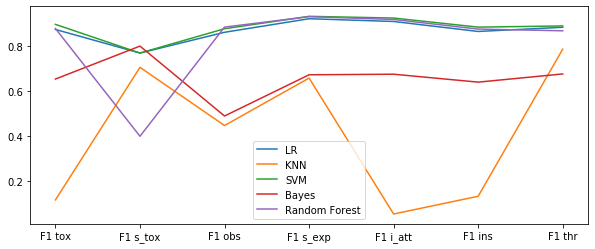

In [85]:
df_f1.transpose().plot(figsize=(10,4), legend=True);

# Manual Test Logistic Regression of Toxic Threat

In [97]:
X = df_thr['comment_text']
y = df_thr['thr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_tfidf, y_train)

# pred = lr.predict(X_test_tfidf)
# pred_train = lr.predict_proba(X_train_tfidf)
# pred_test = lr.predict_proba(X_test_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
comment_1 = ['You are worthless piece of shit. I will kill you when I see you.']
comment_2 = ['I go to school everyday. I have my books, pens, and mobile phone.']
X_test_1 = vectorizer.transform(comment_1)
X_test_2 = vectorizer.transform(comment_2)
lr.predict(X_test_1),lr.predict(X_test_2)

(array([1]), array([0]))

# Gridsearch for Best C = 10, Inverse of regularization strength

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X = df_tox['comment_text']
y = df_tox['tox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

lr = LogisticRegression(max_iter=2000)
# parameters = {'C':[0.01, 0.1, 1, 10],
#               'penalty': ['l1', 'l2', 'elasticnet', 'none']}
parameters = {'C':[0.01, 0.1, 1, 10, 100]}

searcher = GridSearchCV(lr, parameters)
searcher.fit(X_train_tfidf, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=2000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [117]:
searcher.best_params_, searcher.best_score_

({'C': 10}, 0.8881696428571428)

# Evaluate Accuracy where C = 10

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

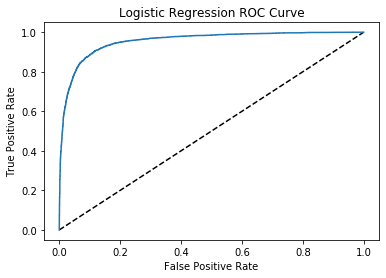

In [123]:
from sklearn.metrics import roc_auc_score, roc_curve

X = df_tox['comment_text']
y = df_tox['tox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

lr = LogisticRegression(C=10, max_iter=2000)
lr.fit(X_train_tfidf, y_train)

y_pred_prob = lr.predict_proba(X_test_tfidf)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

In [127]:
roc_auc_score(y_test, y_pred_prob)

0.9552088651004497